# Esercizio 6

**File:** exercise_6_script.ipynb<br>
**Author:** [G.Marinelli](https://github.com/GuidoMarinelli/)<br>
**Date:** 2023/06/24<br>
**Version:** 1.0<br>
**Description:** Lezione 10 - Librerie: Soluzione Esercizio 6.

Realizzare un programma che calcoli l’integrale di una funzione. Data una funzione un intervallo ed un valore di approssimazione massima:

* calcolare l’integrale della funzione nell’intervallo campionando la funzione in un numero di punti massimo selezionabile dall’utente, ma parta da un _default_
* incrementi ciclicamente il numero di punti di campionamento per migliorare la stima dell’intervallo
* interrompa la stima dell’integrale quando la differenza tra valore precedente ed attuale è minore del valore di approssimazione massima definito
* visualizzi il valore finale dell’integrale ed il numero di iterazioni eseguito per ottenerla
* prepari un grafico che visualizzi la funzione _campionata_ in 3 momenti: alla prima stima _default_, a metà del numero totale di interazioni, la curva finale corrispondente al risultato
* definita una soglia di valore (y) preparare un grafico con solo la porzione di funzione al di sopra della soglia

La gestione della struttura del programma è libera. E’ possibile implementarlo come script o come classe i cui metodi dell’oggetto sono chiamate in un _main_

Come esempio di funzione da integrare usiamo una gaussiana 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Funzioni di utilità

In [2]:
def profilo_gaussiano(x, sigma):
    # valore profilo gaussiano in posizione x, data apertura  
    return np.exp(-0.5*((x/sigma)**2))


def calculate_integral(number_of_points):
    """Funzione che calcola l'integrale di una funzione dati il numero di punti di campionamento."""
    default = 1
    x = np.linspace(-50, 51 - 1, number_of_points + default, dtype='int')
    y = [profilo_gaussiano(i, 10) for i in x]
    
    return np.trapz(profilo_gaussiano(x, 10), x), x, y
    

## Il Programma

In [3]:
max_points = int(input('Please enter the number of points you want to sample the function with: '))
integral = calculate_integral(max_points)
print(f"Given {max_points} sampling points, the value of the integral is {integral[0]}")

Please enter the number of points you want to sample the function with:  10


Given 10 sampling points, the value of the integral is 25.066245308839537


In [4]:
epsilon = 1.0e-5
number_iterations = 0
num_points = 1
diff = 1
prev_integral = 1

while diff >= epsilon:
    actual_integral = calculate_integral(num_points)
    diff = abs(actual_integral[0] - prev_integral)
    
    prev_integral = actual_integral[0]
    number_iterations += 1
    num_points += 1
    
print(f"Value of the integral: {actual_integral[0]}, number of iterations: {number_iterations - 1}")

Value of the integral: 25.06626777171673, number of iterations: 89


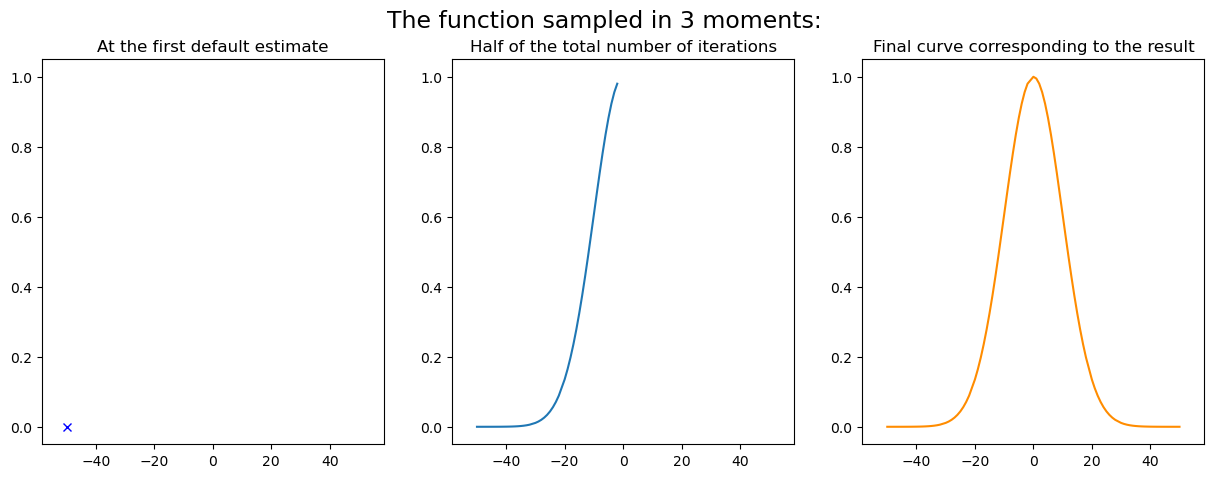

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

x_default = actual_integral[1][0] 
y_default = actual_integral[2][0]

x_half_it = actual_integral[1][:(round(number_iterations / 2))]
y_half_it = actual_integral[2][:(round(number_iterations / 2))]

x_full = actual_integral[1]
y_full = actual_integral[2]

fig.suptitle('The function sampled in 3 moments:', size=17)

ax1.set_title('At the first default estimate')
ax1.set_xlim(xmin=-58.5, xmax=58.5)
ax1.set_ylim(ymin=-0.05, ymax=1.05)
ax1.plot(x_default, y_default, color='b', marker='x')

ax2.set_title('Half of the total number of iterations')
ax2.set_xlim(xmin=-58.5, xmax=58.5)
ax2.set_ylim(ymin=-0.05, ymax=1.05)
ax2.plot(x_half_it, y_half_it)

ax3.set_title('Final curve corresponding to the result')
ax3.set_xlim(xmin=-58.5, xmax=58.5)
ax3.set_ylim(ymin=-0.05, ymax=1.05)
ax3.plot(x_full, y_full, color='darkorange')

plt.show()

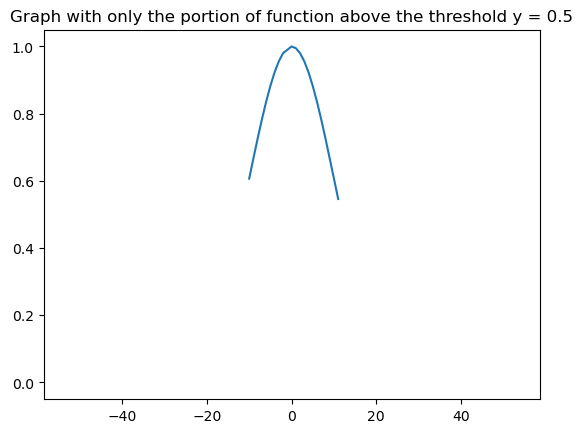

In [6]:
y = 0.5

y_threshold =[]

for value in y_full:
    if value < y:
        y_threshold.append(None)
    else:
        y_threshold.append(value)

fig, ax = plt.subplots()

ax.plot(x_full, y_threshold)
ax.set_xlim(xmin=-58.5, xmax=58.5)
ax.set_ylim(ymin=-0.05, ymax=1.05)
ax.set_title(f'Graph with only the portion of function above the threshold y = {y}')

plt.show()